<a href="https://colab.research.google.com/github/Om301302/Sales-Prediction-for-BigMart/blob/main/Sales_Prediction_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

You can download the dataset manually from [this link](https://drive.google.com/file/d/1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8/view?usp=sharing) or use the following code snippet to load in in google colab directly.

In [ ]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 63.0MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('sales_prediction.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### New *Section*

#**Prepare Trainig and test DataSets **

Here i will split 70% Train and 30% test dataset to make a model.
seed = 42 for reproductibility

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [ ]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

#Data Wrangling

Making a copy of train data so we do not loose or we can exprement

In [ ]:
X_train_c = X_train.copy()

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Now we know that in out data we have many null or missing values we do not want to train that in model


In [ ]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


to check for the negavite values i will do quick describe where it shows the min aand max values


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Item_Weight'>

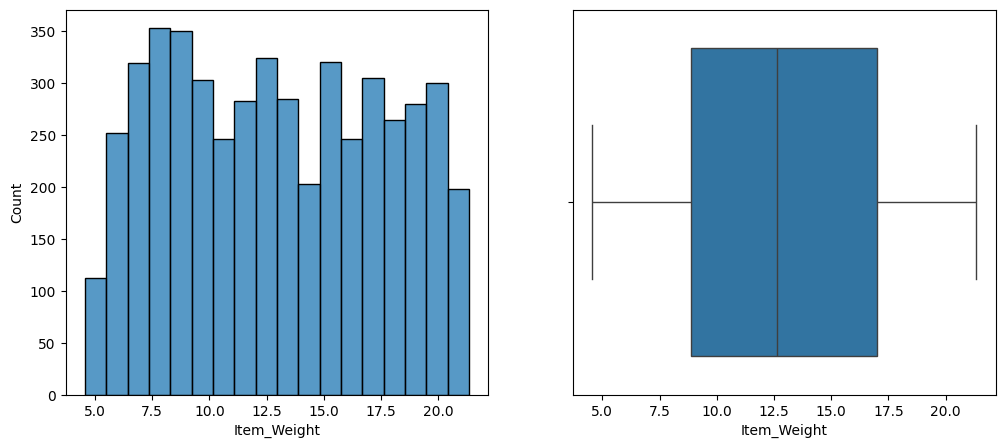

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0])
sns.boxplot(data=X_train_c, x='Item_Weight', ax=ax[1])

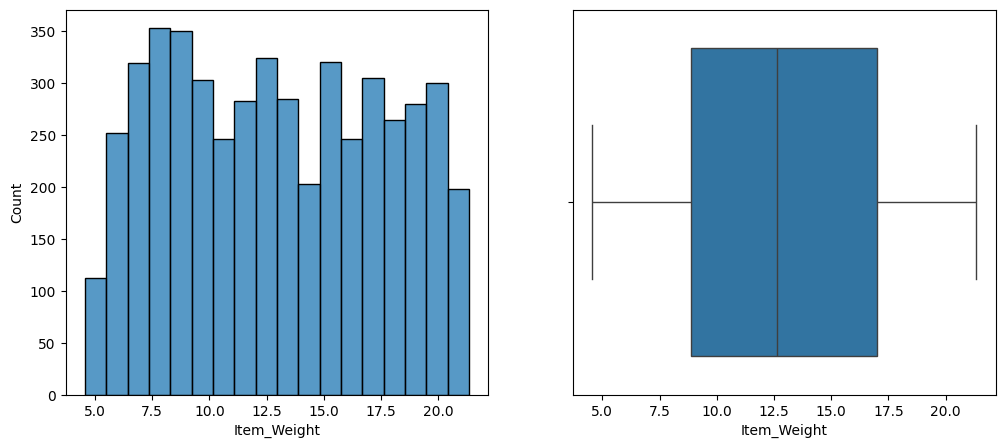

In [ ]:
# prompt: create a visualize_numeric_feature function

def visualize_numeric_feature(df, col_name):
  """
  This function visualizes a numeric feature from a dataframe.

  Args:
      df: The dataframe containing the col_name.
      col_name: The name of the col_name to visualize.
  """

  fig, ax = plt.subplots(1, 2, figsize=(12, 5))

  sns.histplot(data=df, x=col_name, ax=ax[0])
  sns.boxplot(data=df, x=col_name, ax=ax[1])

  plt.show()

visualize_numeric_feature(X_train_c, 'Item_Weight')


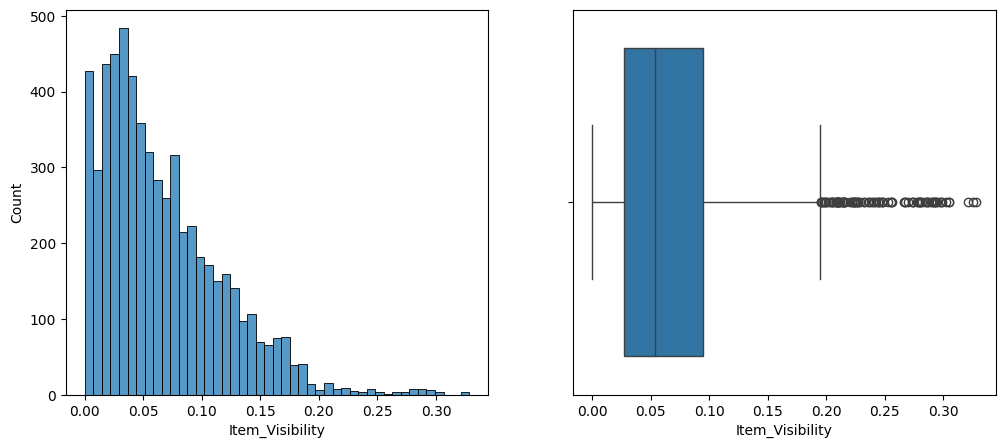

In [ ]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

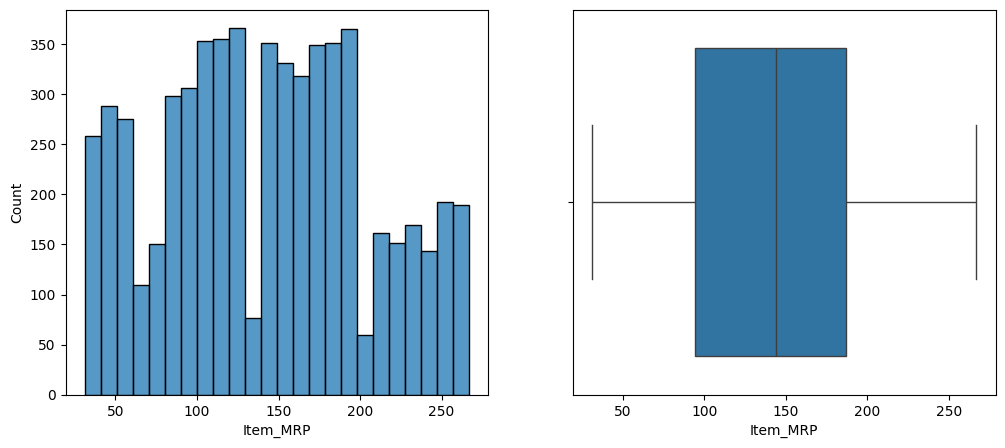

In [ ]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

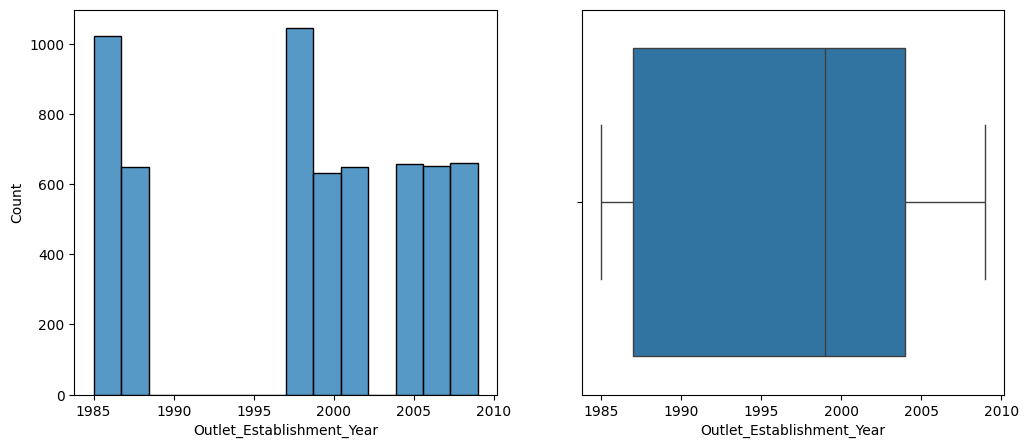

In [ ]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

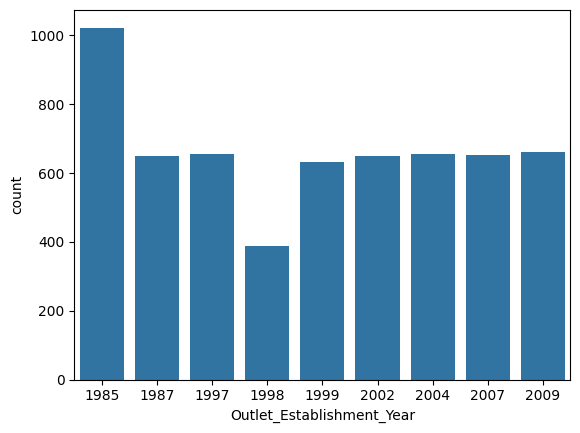

In [ ]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year')

In [ ]:
cat_feature=X_train_c.select_dtypes(include=['object'])
cat_feature.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feature.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
cat_feature['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [ ]:
cat_feature['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

there are differant names for low fat so we nned to change it to same to train our model

In [ ]:
cat_feature['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [ ]:
cat_feature['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [ ]:
cat_feature['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [ ]:
cat_feature['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [ ]:
cat_feature['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

#now since we know the data it is time to do the DATA Wrangling + feature Enginerring

means we will go over each column and do a data cleaning


#Step- 1 Crete high level item Types

In [ ]:
X_train_c['Item_Identifier'].apply(lambda x:x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [ ]:
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [ ]:
#step1 Map items IDS to Item Types


In [ ]:

def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({
                                                 'FD': 'Food',
                                                 'NC':'Non_Consumables',
                                                 'DR':'Drink'
    })
    return data_frame



In [ ]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
X_train_c[['Item_Type', 'Item_Weight']]

,Item_Type,Item_Weight
1921,Food,7.720
655,Non_Consumables,19.750
2229,Food,NaN
2537,Food,19.350
3528,Food,18.350
...,...,...
5734,Food,9.395
5191,Food,15.600
5390,Non_Consumables,17.600
860,Food,20.350


#Step-2: Fill in missing values for Item_Weight

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [ ]:
#step;2 Fill in missing values for item_weight
#logic
#1-use mapping from itemid - weight and fill in missing values
#2- if completely new item
# i.e = item ID not in test \ live data use item type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING= dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()

ITEM_TYPE_WEIGHT_MAPPING= dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()


dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [ ]:
# prompt: # prompt: create a function "impute_item_weight(data_frame); which would first go with id-weight and then type-weight

def impute_item_weight(data_frame):
  # First, use the item ID-weight mapping to fill in missing values
  data_frame['Item_Weight'].fillna(data_frame['Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING), inplace=True)

  # Then, use the item type-weight mapping to fill in any remaining missing values
  data_frame['Item_Weight'].fillna(data_frame['Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING), inplace=True)

  return data_frame


In [ ]:
# # prompt: create a function "impute_item_weight(data_frame); which would first go with id-weight and then type-weight

# def impute_item_weight(data_frame):
#     data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier']).map(ITEM_ID_WEIGHT_MAPPING)
#     data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type']).map(ITEM_TYPE_WEIGHT_MAPPING)

#     return data_frame



In [ ]:
X_train_c = impute_item_weight(X_train_c)
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# fill in for outlet size

In [ ]:
X_train_c.groupby(by=['Outlet_Type', 'Outlet_Size']).size()


Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
from scipy.stats import mode

OUTLET_TYPE_SIZE_PIVOT = X_train.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))

OUTLET_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [ ]:
# prompt: create a impute function

def impute_outlet_size(data_frame):
  data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
  return data_frame

X_train_c = impute_outlet_size(X_train_c)
X_train_c.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Step-4 Standerdize item fat categories

In [ ]:
X_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
#step-4 make item fat content to consitent

def standerdize_item_fat_content(date_frame):
  date_frame['Item_Fat_Content'] = date_frame['Item_Fat_Content'].replace({
                                                      'Low Fat' : 'Low_Fat',
                                                      'LF' : 'Low_Fat',
                                                      'low fat' : 'Low_Fat',
                                                      'reg'     : 'Regular'
  })
  return date_frame

X_train_c = standerdize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [ ]:
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()


Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [ ]:
# Step 5: correct item fat content for non consumables

def correct_item_fat_content(data_frame):
  # Replace their fat content with "Non_Edible"
  data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'

  return data_frame

X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()


Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


#Prepare Database for ML

In [ ]:
def prepare_dataset(data_frame):
  # Step 1: Create high-level item types
  data_frame = create_item_type(data_frame)

  # Step 2: Fill in missing values for Item_Weight
  data_frame = impute_item_weight(data_frame)

  # Step 3: Fill in missing values for Outlet_Size
  data_frame = impute_outlet_size(data_frame)

  # Step 4: Standardize item fat categories
  data_frame = standerdize_item_fat_content(data_frame)

  # Step 5: Correct item fat content for non-consumables
  data_frame = correct_item_fat_content(data_frame)


  return data_frame



In [ ]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [ ]:
X_test = prepare_dataset(X_train)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Handling Categorical Data - EXPT1


1.   Expt-1 All categorical columns - one hot encoded

*   List item
*   List item






In [ ]:
cat_feats = X_train_c.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)



OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [ ]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
# prompt: transofm using one hard encoder for num_feast and cat-feast

num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_test.head()
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_cat_ohe.head()
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final.head()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

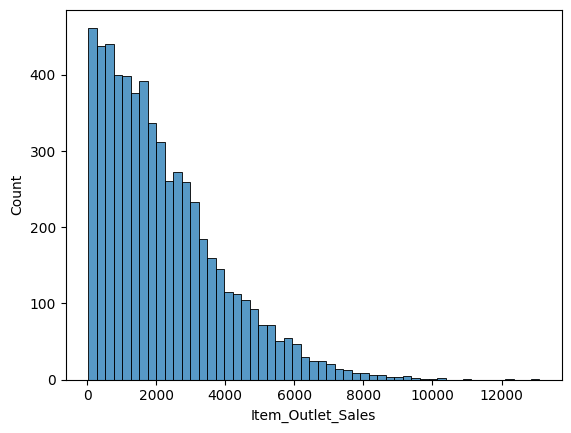

In [ ]:
sns.histplot(y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np


In [ ]:
# prompt: create a resuable function train_andeval_model(model, X_train, y_train, cv=5)

def train_and_eval_model(model, X_train, y_train, cv=5):

  cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'),)
  print('Model:', model)
  r2_scores = cv_results['test_r2']
  print('R2 CV scores:', r2_scores)
  print('R2 CV scores mean / stdev:' , np.mean(r2_scores), '/', np.std(r2_scores))

  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-1*score for score in rmse_scores]
  print('RMSE CV scores:', rmse_scores)
  print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [ ]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean / stdev: 0.5429242875459817 / 0.01828158855152387
RMSE CV scores: [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV scores mean / stdev: 1161.9339951352256 / 32.888811410647826


In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev: 0.5891824563495011 / 0.01880337124010431
RMSE CV scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev: 1101.5034553447979 / 33.864902948875674


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [ ]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean / stdev: 0.5577825481764618 / 0.021778582707669483
RMSE CV scores: [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.893076803

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

#Handling Categorical Data - EXPT2

Expt-2 All categorial columns - native handling


In [ ]:
X_train_copy = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude=['object']).columns.tolist()
cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [ ]:
X_train_copy [cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols+num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
ordinal_encoder = make_column_transformer (
        (
        OrdinalEncoder (handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector (dtype_include="category"),
        ),
        remainder="passthrough",
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
          random_state=42, categorical_features=categorical_mask
              ) ,
)

train_and_eval_model(model=hgb, X_train=X_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e52fc8468c0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_copy, y_train=y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

#Handling Categorical Data-EXPT 3

Expt-3: No Item Identifier - one hot encoded

In [ ]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:

num_feats_train = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)

X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final.shape

(5966, 30)

In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev: 0.5891824563495011 / 0.01880337124010431
RMSE CV scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev: 1101.5034553447979 / 33.864902948875674


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [ ]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV scores mean / stdev: 0.48350910211416415 / 0.023122182697374725
RMSE CV scores: [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1268.41713837

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

We can see from the upper model what is the r*2 and rmsv(root mean square error) and error jhase decreased and r2 is increased which gives acurasy to  the model.

#Handling categorical Data EXPT-4

Expt-4: Item identifier - feature, rest categorical - one hot encoded.

In [ ]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Convert the single column 'Item_Identifier' into an iterable over iterables of strings
# You can achieve this by passing a list of lists where each inner list contains one string
X_train_item_identifier = [[item] for item in X_train['Item_Identifier']]

# Now, pass the converted iterable to the transform method
hashed_df = pd.DataFrame(fh.transform(X_train_item_identifier).toarray(),
                         columns=['H'+str(i) for i in range(hash_vector_size)])
hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:

num_feats_train = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)

X_train_final = pd.concat([num_feats_train, hashed_df, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final.shape

(5966, 80)

In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV scores mean / stdev: 0.5845457617560487 / 0.024698108181039926
RMSE CV scores: [1061.2804537177167, 1093.5955805535832, 1143.6066269002074, 1070.3168274550164, 1169.1121612583172]
RMSE CV scores mean / stdev: 1107.5823299769681 / 41.980663856347405


In [ ]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.53676464 0.48594853 0.47719171 0.53119059 0.4537317 ]
R2 CV scores mean / stdev: 0.496965433032841 / 0.03205266365570525
RMSE CV scores: [1146.7506604419434, 1217.8851239011724, 1262.4894157229014, 1183.8748256970878, 1282.61788146

In [ ]:
X_test.shape


(5966, 11)

In [ ]:
X_train_item_identifier = [[item] for item in X_test['Item_Identifier']]

hashed_test_df = pd.DataFrame(fh.transform(X_train_item_identifier).toarray(),
                         columns=['H'+str(i) for i in range(hash_vector_size)])
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame (ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat ([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)
X_test_final.head ()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_final.shape

(5966, 80)

In [ ]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
xgr.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgr.predict(X_test_final)
y_pred

array([ 377.41058, 1582.6122 , 3258.6926 , ..., 4724.8633 , 1468.8391 ,
       1478.7004 ], dtype=float32)

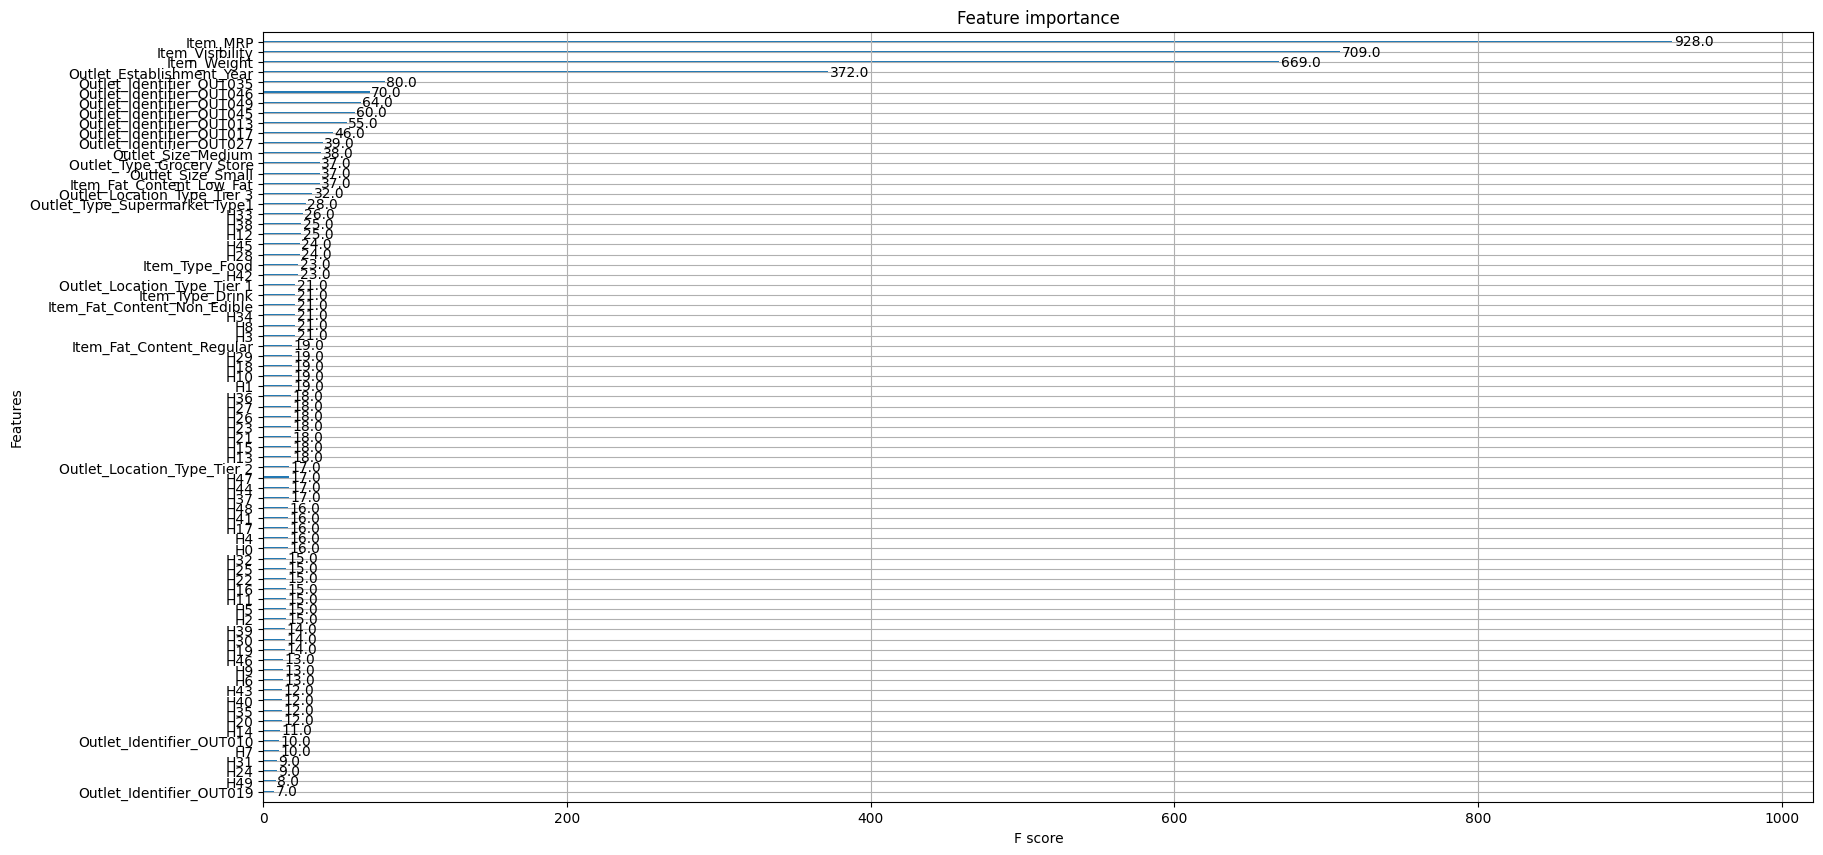

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(20, 10))
plot_importance(xgr, ax=ax);